<a href="https://colab.research.google.com/github/berdem21/Cross-View-Gait-Based-Human-Identification-with-Deep-CNNs/blob/master/cnn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import TimeDistributed, LSTM, Input
from tensorflow.keras.models import Model



In [2]:
from PIL import Image
import os
import pandas as pd
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:

# Specify the folder containing .tif images
# Search for all subfolders and files that are .tif images
folder_path = 'photos'
tif_images = {} # Dictionary to store images keys are as filenames
filenames = []
for root, dirs, files in os.walk(folder_path):
    for filename in files:
        if filename.endswith('.tif'):
            image_path = os.path.join(root, filename)
            image = Image.open(image_path)
            filenames.append(filename)
            tif_images[filename] = image

print(f"Loaded {len(tif_images)} .tif images from all subfolders.")


Loaded 0 .tif images from all subfolders.


In [5]:
data = pd.read_csv('data.csv',delimiter=';')

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [ ]:
filenames

In [ ]:
data.info()

In [ ]:
data_photos = data[data['Image_Name'].isin(filenames)]

In [ ]:
data_photos_direct = data_photos[data_photos['Culture_Technique '] == 'direct']

In [ ]:
data_photos_direct.info()

In [ ]:
data_photos_direct['Migration Capacity '] = (data_photos_direct['Migration Capacity ']
    .str.replace(',', '.')  # Replace comma with period
    .astype(float))

In [ ]:
migration_capacity_dict = dict(zip(data_photos_direct['Image_Name'], data_photos_direct['Migration Capacity ']))

In [ ]:
data_d3_e1 = list(data_photos_direct['Image_Name'][(data_photos_direct['ExperimentSeries'] == 1) & (data_photos_direct['Day'] == 3)])
data_d3_e2 = list(data_photos_direct['Image_Name'][(data_photos_direct['ExperimentSeries'] == 2) & (data_photos_direct['Day'] == 3)])
data_d5_e1 = list(data_photos_direct['Image_Name'][(data_photos_direct['ExperimentSeries'] == 1) & (data_photos_direct['Day'] == 5)])
data_d5_e2 = list(data_photos_direct['Image_Name'][(data_photos_direct['ExperimentSeries'] == 2) & (data_photos_direct['Day'] == 5)])
data_d7_e1 = list(data_photos_direct['Image_Name'][(data_photos_direct['ExperimentSeries'] == 1) & (data_photos_direct['Day'] == 7)])
data_d7_e2 = list(data_photos_direct['Image_Name'][(data_photos_direct['ExperimentSeries'] == 2) & (data_photos_direct['Day'] == 7)])

In [ ]:
print("Length of data_d3_e1:", len(data_d3_e1))
print("Length of data_d3_e2:", len(data_d3_e2))
print("Length of data_d5_e1:", len(data_d5_e1))
print("Length of data_d5_e2:", len(data_d5_e2))
print("Length of data_d7_e1:", len(data_d7_e1))
print("Length of data_d7_e2:", len(data_d7_e2))

In [ ]:
sequences_e1 = []
for i1 in data_d3_e1:
    for i2 in data_d5_e1:
        for i3 in data_d7_e1:
            sequences_e1.append([i1, i2, i3])

sequences_e2 = []
for i1 in data_d3_e2:
    for i2 in data_d5_e2:
        for i3 in data_d7_e2:
            sequences_e2.append([i1, i2, i3])

sequences = sequences_e1 + sequences_e2

In [ ]:
labels = [seq[-1] for seq in sequences]
sequences = [seq[:-1] for seq in sequences]

In [ ]:
data_train, data_test, label_train, label_test = train_test_split(sequences, labels, test_size=0.15)

In [ ]:
data_train = np.array(data_train)
data_test = np.array(data_test)
label_train = np.array(label_train)
label_test = np.array(label_test)
data_train.shape , data_test.shape

In [6]:
def reshape_images(image_dict, target_size=(224, 224)):
    """
    Reshapes the images in the dictionary to the target size and converts them to numpy arrays.

    Parameters:
        image_dict (dict): Dictionary where keys are filenames and values are PIL Image objects.
        target_size (tuple): Target size to reshape the images (width, height).

    Returns:
        dict: Dictionary with the same keys but values as reshaped numpy arrays.
    """
    reshaped_images = {}
    for filename, image in image_dict.items():
        reshaped_image = image.resize(target_size)
        reshaped_images[filename] = np.array(reshaped_image)
    return reshaped_images


In [7]:
photos_array = reshape_images(tif_images, target_size=(224,224))

In [ ]:
data_train

array([['direct1_1_U87_2D3.tif', 'direct2_4_U87_2D5.tif'],
       ['direct1_1_U87_2D3.tif', 'direct2_4_U87_2D5.tif'],
       ['direct1_5_U87_2D3.tif', 'direct1_4_U87_2D5.tif'],
       ['direct2_3_U87_2D3.tif', 'direct3_2_U87_2D5.tif'],
       ['direct1_1_U87_2D3.tif', 'direct2_2_U87_2D5.tif'],
       ['direct1_5_U87_2D3.tif', 'direct1_5_U87_2D5.tif'],
       ['direct1_1_U87_2D3.tif', 'direct2_4_U87_2D5.tif'],
       ['diret2_1_U87_2D3.tif', 'direct2_2_U87_2D5.tif'],
       ['diret2_1_U87_2D3.tif', 'direct2_4_U87_2D5.tif'],
       ['direct1_5_U87_2D3.tif', 'direct3_2_U87_2D5.tif'],
       ['direct2_3_U87_2D3.tif', 'direct2_4_U87_2D5.tif'],
       ['diret2_1_U87_2D3.tif', 'direct1_4_U87_2D5.tif'],
       ['diret2_1_U87_2D3.tif', 'direct2_4_U87_2D5.tif'],
       ['direct1_U87_1D3.tif', 'direct2-U87_1D5.tif'],
       ['direct1_U87_1D3.tif', 'direct1-U87_1D5.tif'],
       ['direct1_5_U87_2D3.tif', 'direct2_4_U87_2D5.tif'],
       ['diret2_1_U87_2D3.tif', 'direct3_3_U87_2D5.tif'],
       ['d

In [ ]:
X_train = [[photos_array[f] for f in seq] for seq in data_train]
X_train = np.array(X_train)
X_test = [[photos_array[f] for f in seq] for seq in data_test]
X_test = np.array(X_test)

In [ ]:
y_train = np.array([migration_capacity_dict[f] for f in label_train])
y_test = np.array([migration_capacity_dict[f] for f in label_test])

In [ ]:
X_train[0].shape

(2, 224, 224, 3)

In [ ]:
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))

In [ ]:
cnn_model = Sequential([
Conv2D(32, (3, 3), activation='relu', input_shape=(224,224, 3)),
MaxPooling2D((2, 2)),
Flatten(),
Dense(16, activation='relu')
])

input_layer = Input(shape=(2, 224,224, 3))
encoded_sequence = TimeDistributed(cnn_model)(input_layer)

# Add RNN layers
lstm_out = LSTM(32, return_sequences=False)(encoded_sequence)

# Add Dense layers for final prediction
x = Dense(16, activation='relu')(lstm_out)
output = Dense(1)(x)  # Single real value output

model = Model(inputs=input_layer, outputs=output)

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
)

Epoch 1/30
3/3 [==============================] - 1s 155ms/step - loss: 41.5564 - mae: 6.3014
Epoch 2/30
3/3 [==============================] - 1s 155ms/step - loss: 40.2248 - mae: 6.1963
Epoch 3/30
3/3 [==============================] - 1s 158ms/step - loss: 38.9846 - mae: 6.0931
Epoch 4/30
3/3 [==============================] - 1s 153ms/step - loss: 37.6048 - mae: 5.9802
Epoch 5/30
3/3 [==============================] - 1s 154ms/step - loss: 36.5411 - mae: 5.8908
Epoch 6/30
3/3 [==============================] - 1s 154ms/step - loss: 35.2152 - mae: 5.7787
Epoch 7/30
3/3 [==============================] - 1s 152ms/step - loss: 34.1426 - mae: 5.6860
Epoch 8/30
3/3 [==============================] - 1s 155ms/step - loss: 33.1118 - mae: 5.5937
Epoch 9/30
3/3 [==============================] - 1s 153ms/step - loss: 32.1665 - mae: 5.5075
Epoch 10/30
3/3 [==============================] - 1s 152ms/step - loss: 31.1068 - mae: 5.4115
Epoch 11/30
3/3 [==============================] - 1s 151ms

In [ ]:
predictions = model.predict(X_test)

1/1 [==============================] - 0s 155ms/step


In [ ]:
real_predictions = scaler.inverse_transform(predictions)


In [ ]:
mape = np.mean(np.abs((real_predictions - y_test) / y_test))
mape * 100

256.25470566072323

In [ ]:
predictions_train = model.predict(X_train)
real_predictions_train = scaler.inverse_transform(predictions_train)
mape_train = np.mean(np.abs((real_predictions_train - y_train) / y_train))
mape_train * 100

3/3 [==============================] - 0s 45ms/step


285.45727889351633

In [ ]:
import matplotlib.pyplot as plt


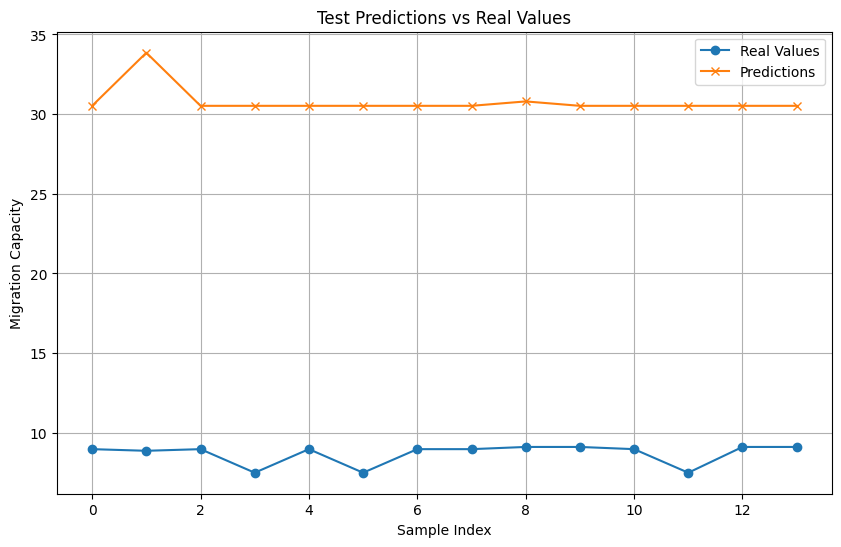

In [ ]:

# Plot real values vs predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Real Values', marker='o')
plt.plot(real_predictions, label='Predictions', marker='x')
plt.title('Test Predictions vs Real Values')
plt.xlabel('Sample Index')
plt.ylabel('Migration Capacity')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
predictions

array([[0.1586965],
       [0.1586965],
       [0.1586965],
       [0.1586965],
       [0.1586965],
       [0.1586965],
       [0.1586965],
       [0.1586965],
       [0.1586965],
       [0.1586965],
       [0.1586965],
       [0.1586965],
       [0.1586965],
       [0.1586965]], dtype=float32)

In [ ]:
X_test[0]

array([[[[15,  0,  0],
         [14,  0,  0],
         [15,  0,  0],
         ...,
         [15,  0,  0],
         [16,  0,  0],
         [15,  0,  0]],

        [[15,  0,  0],
         [14,  0,  0],
         [12,  0,  0],
         ...,
         [17,  0,  0],
         [13,  0,  0],
         [14,  0,  0]],

        [[15,  0,  0],
         [14,  0,  0],
         [13,  0,  0],
         ...,
         [16,  0,  0],
         [16,  0,  0],
         [16,  0,  0]],

        ...,

        [[13,  0,  0],
         [14,  0,  0],
         [15,  0,  0],
         ...,
         [10,  0,  0],
         [15,  0,  0],
         [15,  0,  0]],

        [[13,  0,  0],
         [14,  0,  0],
         [15,  0,  0],
         ...,
         [11,  0,  0],
         [14,  0,  0],
         [16,  0,  0]],

        [[12,  0,  0],
         [14,  0,  0],
         [15,  0,  0],
         ...,
         [25,  0,  0],
         [16,  0,  0],
         [14,  0,  0]]],


       [[[16,  0,  0],
         [15,  0,  0],
         [15, 

In [ ]:
X_test[1]

array([[[[ 2,  0,  0],
         [ 5,  0,  0],
         [ 5,  0,  0],
         ...,
         [ 5,  0,  0],
         [ 3,  0,  0],
         [ 4,  0,  0]],

        [[ 6,  0,  0],
         [ 3,  0,  0],
         [ 5,  0,  0],
         ...,
         [ 5,  0,  0],
         [ 6,  0,  0],
         [ 5,  0,  0]],

        [[ 4,  0,  0],
         [ 4,  0,  0],
         [ 3,  0,  0],
         ...,
         [ 5,  0,  0],
         [ 5,  0,  0],
         [ 3,  0,  0]],

        ...,

        [[ 0,  0,  0],
         [ 2,  0,  0],
         [ 4,  0,  0],
         ...,
         [ 2,  0,  0],
         [ 4,  0,  0],
         [ 3,  0,  0]],

        [[ 6,  0,  0],
         [ 4,  0,  0],
         [ 4,  0,  0],
         ...,
         [ 1,  0,  0],
         [ 5,  0,  0],
         [ 8,  0,  0]],

        [[ 4,  0,  0],
         [ 3,  0,  0],
         [ 3,  0,  0],
         ...,
         [ 5,  0,  0],
         [ 2,  0,  0],
         [ 5,  0,  0]]],


       [[[13,  0,  0],
         [12,  0,  0],
         [14, 